load the data. use sklearn.dataset import iris

In [5]:
from sklearn import datasets
import pandas as pd

data = datasets.load_iris()
train = data.data
label = data.target
all = pd.DataFrame(train,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
alllabel = pd.DataFrame(label,columns=['Species'])
raw = pd.concat([all,alllabel],axis=1)
print(raw.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


divide test_data and train_data

In [6]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_label,Y_test = train_test_split(train,label,test_size=0.3,random_state=0)

use seaborn to see the feature to feature

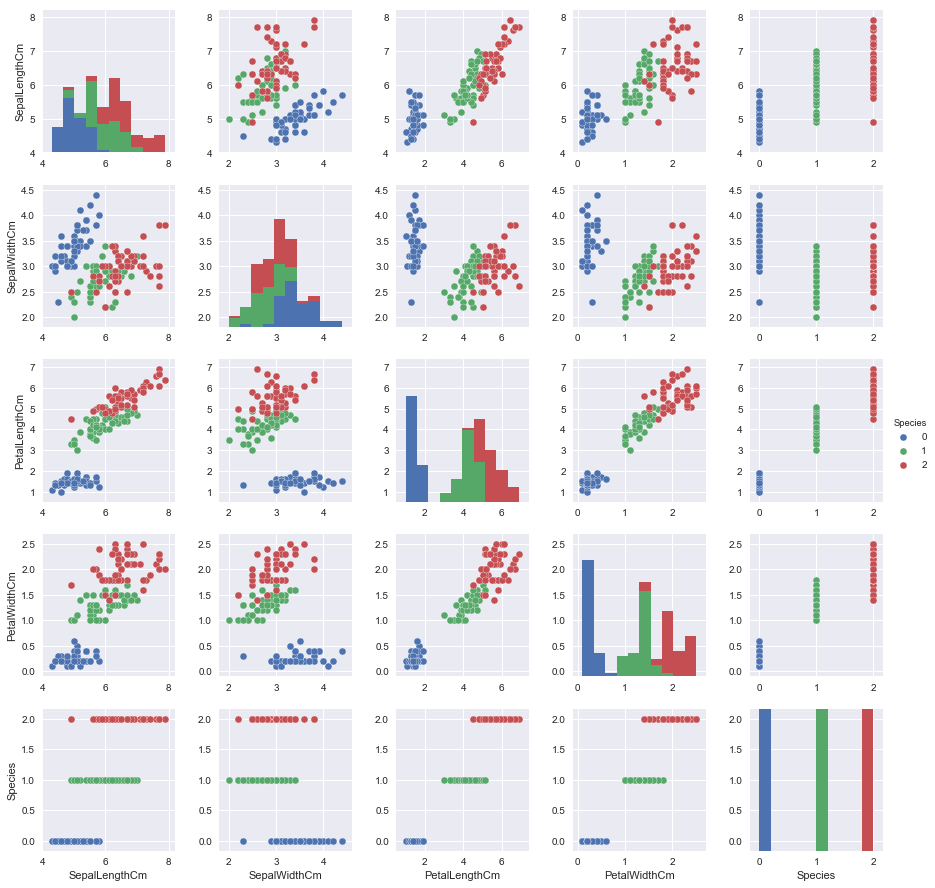

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()#使用默认配色 
sns.pairplot(raw,hue="Species")#hue 选择分类列  
plt.show()

use sklearn.ensemble ExtraTreesClassifier to select the feature, see each the importance of feature 

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(train, label)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.12932473  0.08316472  0.42962319  0.35788735]


In [9]:
from sklearn import preprocessing
import numpy as np
# normalize the data attributes
a = np.array(train,np.float64)
normalized_X = preprocessing.normalize(a)
print(normalized_X[0:4])
# standardize the data attributes
b = np.array(train,np.float64)
standardized_X = preprocessing.scale(b)
print(standardized_X[0:3])


[[ 0.80377277  0.55160877  0.22064351  0.0315205 ]
 [ 0.82813287  0.50702013  0.23660939  0.03380134]
 [ 0.80533308  0.54831188  0.2227517   0.03426949]
 [ 0.80003025  0.53915082  0.26087943  0.03478392]]
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]]


we use logisticRegression algrothmn

In [10]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train, label)
print(model)
# make predictions
expected = label
predicted = model.predict(train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


### we use naive_bayes algrothmn

In [11]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train, label)
print(model)
# make predictions
expected = label
predicted = model.predict(train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


### knn algrothmn

In [12]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(train, label)
print(model)
# make predictions
expected = label
predicted = model.predict(train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.94      0.95        50
          2       0.94      0.96      0.95        50

avg / total       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


### use DecisionTree algrothmn

In [13]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(train, label)
print(model)
# make predictions
expected = label
predicted = model.predict(train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


### use svm algrothmn

In [14]:
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data
model = SVC()
model.fit(train, label)
print(model)
# make predictions
expected = label
predicted = model.predict(train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      0.96      0.98        50
          2       0.96      1.00      0.98        50

avg / total       0.99      0.99      0.99       150

[[50  0  0]
 [ 0 48  2]
 [ 0  0 50]]


we alson can use cross_validation to check the model

In [15]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(model,train,label,cv=10,n_jobs=1)
print("accuracy: %.3f +/- %.3f"%(np.mean(score),np.std(score)))

accuracy: 0.980 +/- 0.031


### we can use time to calculate the program time

In [16]:
import time
start_time = time.time()
print('training took %fs!'%(time.time()-start_time))

training took 0.000000s!
